In [1]:
import pandas as pd
import pyarrow.parquet as pq
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample

#df of log returns
df_1m= pd.read_parquet("data/clean/1m/data_clean_1m.parquet")

df_5m= pd.read_parquet("data/clean/5m/data_clean_5m.parquet")


#df of close prices
df_1m_close= pd.read_parquet("data/clean/1m/data_clean_1m_close.parquet")

#df of normalized close prices
df_1m_close_norm=df_1m_close/df_1m_close.iloc[0]

In [2]:
tickers = pd.read_csv('tickers/s&p.csv')

#Sort tickers by symbol to have same order as df
tickers=tickers.sort_values(by=['Symbol'])

#Take out tickers not in df
tickers=tickers[tickers["Symbol"].isin(df_1m.columns)]
tickers.reset_index(drop=True, inplace=True)

tickers

,Symbol,Name,Sector
0,A,Agilent Technologies,Health Care
1,AAL,American Airlines Group,Industrials
2,AAP,Advance Auto Parts,Consumer Discretionary
3,AAPL,Apple,Information Technology
4,ABBV,AbbVie,Health Care
...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary
499,ZBH,Zimmer Biomet,Health Care
500,ZBRA,Zebra Technologies,Information Technology
501,ZION,Zions Bancorp,Financials


In [3]:
#Get random sample for plot

sequence = [i for i in range(len(df_1m.columns))]
subset = sample(sequence, 10)

In [4]:
tickers["Sector"].unique()

array(['Health Care', 'Industrials', 'Consumer Discretionary',
       'Information Technology', 'Consumer Staples', 'Utilities',
       'Financials', 'Materials', 'Real Estate', 'Energy',
       'Communication Services'], dtype=object)

In [ ]:
industrials=tickers[tickers["Sector"]=="Industrials"].index
industrials

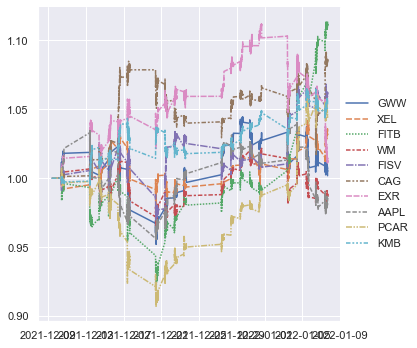

In [143]:
#Plot of normalized close values
#Problem is that I dont know ho to reduce the size of legend (too many points that is why I had a random sample)

sns.set() # set default style 
sns.relplot(data=df_1m_close_norm[df_1m_close_norm.columns[subset]], kind="line",legend="brief")


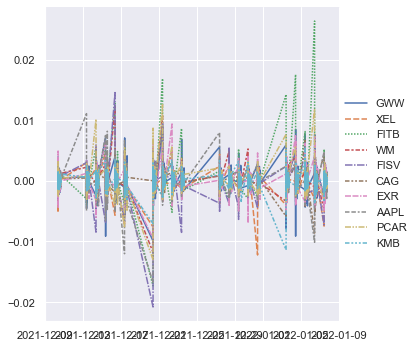

In [145]:
#Plot of log returns

sns.set() # set default style 
sns.relplot(data=df_1m[df_1m.columns[subset]], kind="line",legend="brief")



In [ ]:
sns.set() # set default style 
sns.relplot(col="TICKER", data=FX_scaled, kind="line", col_wrap=5 );



In [140]:
#Create staked df for plotting

df_staked=df_1m.stack(level=[0]).reset_index(level=[1]).rename(columns={'level_1': 'Ticker', 0: "Logret"})

In [150]:
to_rep=tickers["Sector"]
sec=np.tile(to_rep,7785)
df_staked["Sector"]=sec
df_staked["Date"]=df_staked.index

In [151]:
df_staked

,Ticker,Logret,Sector,Date
2021-12-10 09:30:00-05:00,A,0.000000,Health Care,2021-12-10 09:30:00-05:00
2021-12-10 09:30:00-05:00,AAL,0.000000,Industrials,2021-12-10 09:30:00-05:00
2021-12-10 09:30:00-05:00,AAP,0.000000,Consumer Discretionary,2021-12-10 09:30:00-05:00
2021-12-10 09:30:00-05:00,AAPL,0.000000,Information Technology,2021-12-10 09:30:00-05:00
2021-12-10 09:30:00-05:00,ABBV,0.000000,Health Care,2021-12-10 09:30:00-05:00
...,...,...,...,...
2022-01-07 15:59:00-05:00,YUM,-0.000148,Consumer Discretionary,2022-01-07 15:59:00-05:00
2022-01-07 15:59:00-05:00,ZBH,0.000742,Health Care,2022-01-07 15:59:00-05:00
2022-01-07 15:59:00-05:00,ZBRA,-0.002015,Information Technology,2022-01-07 15:59:00-05:00
2022-01-07 15:59:00-05:00,ZION,-0.000143,Financials,2022-01-07 15:59:00-05:00


In [ ]:
sns.set() # set default style 
sns.relplot(data=df_staked, x="Date", y= "Logret", kind="line", col="Sector",hue="Ticker",col_wrap=5, legend=False)



# Clustering

In [3]:
#!pip install nbimporter
import nbimporter

%run Fonctions_projet.ipynb

In [6]:
#Rolling clustering


#Cluster tickers

#Compute T=3*N
N=df_5m.shape[1]
T=3*N

#Number of windows possible
lag_max=df_5m.shape[0]-T
#lag_max=50
liste=RolledCluster(df_5m,T,"/Users/mrobaux/Desktop/Financial big data/projet",False,False,lag_max)

In [7]:
liste

Delayed('RolledCluster-962e3b27-9039-41fb-beb2-dbc9d98fdf9e')

In [5]:
dask.compute(dask.compute(liste))

KeyboardInterrupt: 

In [94]:
number_of_clusters=[]
for element in liste:
    number_of_clusters.append(element["Cluster"].unique().max()+1)

TypeError: tuple indices must be integers or slices, not str

(array([ 2.,  0., 43.,  0.,  0., 50.,  0.,  3.,  0.,  1.]),
 array([3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8, 6.2, 6.6, 7. ]),
 <BarContainer object of 10 artists>)

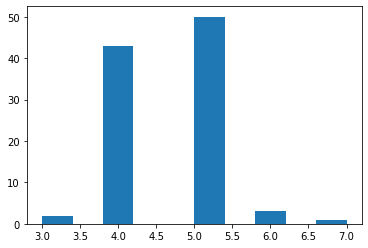

In [49]:
plt.hist(number_of_clusters)

In [97]:
liste[0][0]

[      Cluster
 A           0
 AAL         1
 AAP         1
 AAPL        0
 ABBV        2
 ...       ...
 YUM         1
 ZBH         0
 ZBRA        0
 ZION        1
 ZTS         0
 
 [503 rows x 1 columns],
       Cluster
 A           0
 AAL         1
 AAP         1
 AAPL        0
 ABBV        2
 ...       ...
 YUM         1
 ZBH         0
 ZBRA        0
 ZION        1
 ZTS         0
 
 [503 rows x 1 columns],
       Cluster
 A           0
 AAL         1
 AAP         1
 AAPL        0
 ABBV        2
 ...       ...
 YUM         1
 ZBH         0
 ZBRA        0
 ZION        1
 ZTS         0
 
 [503 rows x 1 columns],
       Cluster
 A           0
 AAL         1
 AAP         1
 AAPL        0
 ABBV        2
 ...       ...
 YUM         1
 ZBH         0
 ZBRA        0
 ZION        1
 ZTS         0
 
 [503 rows x 1 columns],
       Cluster
 A           1
 AAL         0
 AAP         0
 AAPL        1
 ABBV        3
 ...       ...
 YUM         0
 ZBH         1
 ZBRA        1
 ZION        0
 ZTS   